In [1]:
import os

import tikzplotlib
import jax.numpy as jnp
import matplotlib.pyplot as plt


In [6]:
output_dir = "outputs/"
kernel_plot = "SquaredExponential"
plot_ls = [0.1, 1.0]
n_samps_plot = 15
x0 = 0
x1 = 1
n_data = 80

In [7]:
x = jnp.linspace(x0, x1, n_data)    

In [8]:
gp_prior_paths = [os.path.join(output_dir, f"GP_{kernel_plot}_{str(ls).replace('.', '_')}.npz") for ls in plot_ls]
prior_cvae_paths = [os.path.join(output_dir, f"PriorCVAE_{kernel_plot}_{str(ls).replace('.', '_')}.npz") for ls in plot_ls]
prior_vae_paths = [os.path.join(output_dir, f"PriorVAE_{kernel_plot}_{str(ls).replace('.', '_')}.npz") for ls in plot_ls]


<Figure size 640x480 with 0 Axes>

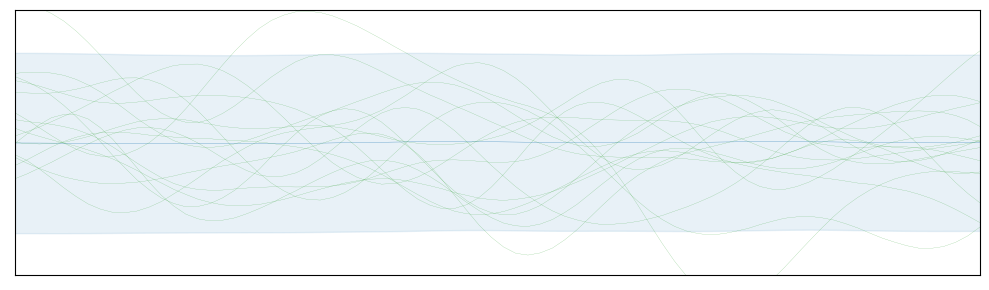

<Figure size 640x480 with 0 Axes>

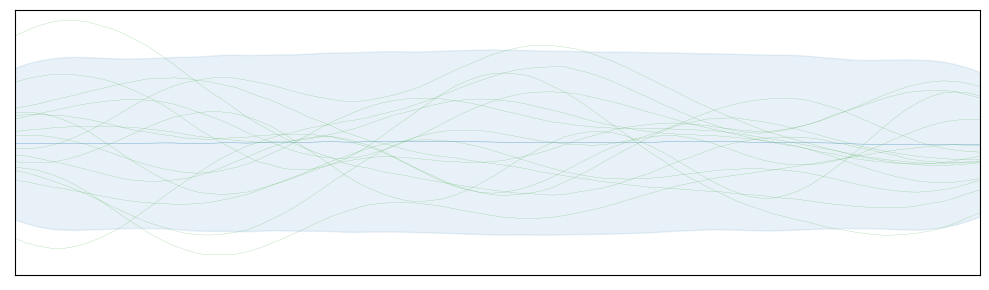

<Figure size 640x480 with 0 Axes>

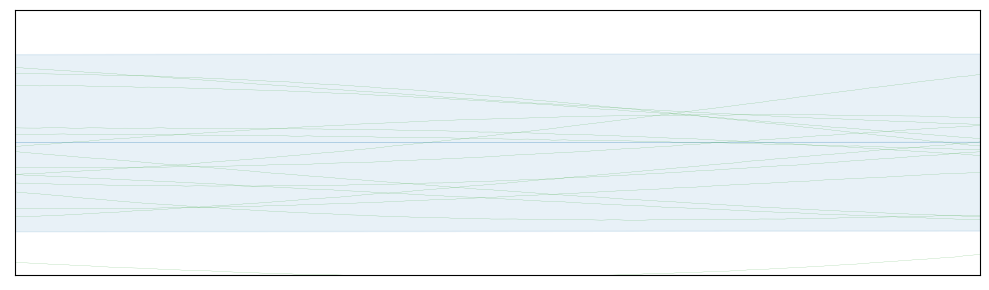

<Figure size 640x480 with 0 Axes>

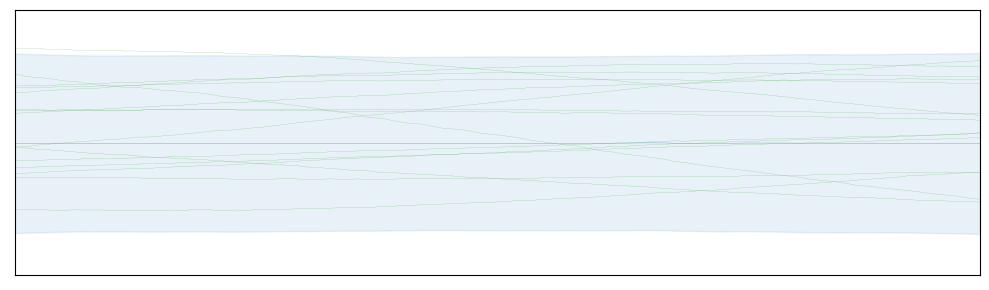

In [12]:
for ls, gp, cvae, vae in zip(plot_ls, gp_prior_paths, prior_cvae_paths, prior_vae_paths):
    gp_data = jnp.load(gp)
    cvae_data = jnp.load(cvae)
#     vae_data = jnp.load(vae)
    
    gp_samps = gp_data["samples"]
    gp_samps_mean = gp_data["samples_mean"]
    gp_samps_std = gp_data["samples_std"]
    
    cvae_samps = cvae_data["samples"]
    cvae_samps_mean = cvae_data["samples_mean"]
    cvae_samps_std = cvae_data["samples_std"]

#     vae_samps = vae_data["samples"]
#     vae_samps_mean = vae_data["samples_mean"]
#     vae_samps_std = vae_data["samples_std"]
    
    # GP
    plt.clf()
    fig, axs = plt.subplots(1, 1, figsize=(10, 3))
    plt.plot(x, gp_samps_mean, c="tab:blue", label="GP", linestyle="solid", linewidth=0.2)
    plt.fill_between(x,  gp_samps_mean - 2 * gp_samps_std,  gp_samps_mean + 2 * gp_samps_std, color="tab:blue", 
                     alpha=0.1)
    for s in gp_samps[:n_samps_plot]:
        plt.plot(x, s, c="tab:green", linewidth=0.1)
    
    plt.ylim([-3, 3])
    plt.xlim([x[0], x[-1]])
    plt.yticks([])
    plt.xticks([])
    plt.tight_layout()
    output_tik_path = os.path.join(output_dir, kernel_plot, f"GP_samps_{str(ls).replace('.', '_')}.tex")
    tikzplotlib.save(output_tik_path,
                     figurewidth='\\figurewidth', figureheight='\\figureheight',
                     tex_relative_path_to_data='fig/',
                     figure=fig)
    plt.show()
    
    # PriorCVAE
    plt.clf()
    fig, axs = plt.subplots(1, 1, figsize=(10, 3))
    plt.plot(x, cvae_samps_mean, c="tab:blue", label="GP", linestyle="solid", linewidth=0.2)
    plt.fill_between(x,  cvae_samps_mean - 2 * cvae_samps_std,  cvae_samps_mean + 2 * cvae_samps_std, 
                     color="tab:blue", alpha=0.1)
    for s in cvae_samps[:n_samps_plot]:
        plt.plot(x, s, c="tab:green", linewidth=0.1)
    plt.ylim([-3, 3])
    plt.xlim([x[0], x[-1]])
    plt.yticks([])
    plt.xticks([])
    plt.tight_layout()
    output_tik_path = os.path.join(output_dir, kernel_plot, f"PriorCVAE_samps_{str(ls).replace('.', '_')}.tex")
    tikzplotlib.save(output_tik_path,
                     figurewidth='\\figurewidth', figureheight='\\figureheight',
                     tex_relative_path_to_data='fig/',
                     figure=fig)
    plt.show()
    
    # PriorVAE
#     plt.clf()
#     fig, axs = plt.subplots(1, 1, figsize=(10, 3))
#     plt.plot(x, vae_samps_mean, c="tab:blue", label="GP", linestyle="solid", linewidth=0.2)
#     plt.fill_between(x,  vae_samps_mean - 2 * vae_samps_std,  vae_samps_mean + 2 * vae_samps_std, 
#                      color="tab:blue", alpha=0.1)
#     for s in vae_samps[:n_samps_plot]:
#         plt.plot(x, s, c="tab:green", linewidth=0.1)
        
#     plt.ylim([-3, 3])
#     plt.xlim([x[0], x[-1]])
#     plt.yticks([])
#     plt.xticks([])
#     plt.tight_layout()
#     output_tik_path = os.path.join(output_dir, kernel_plot, f"PriorVAE_samps_{str(ls).replace('.', '_')}.tex")
#     tikzplotlib.save(output_tik_path,
#                      figurewidth='\\figurewidth', figureheight='\\figureheight',
#                      tex_relative_path_to_data='fig/',
#                      figure=fig)
#     plt.show()

## Covariance plot

In [13]:
if not os.path.exists(os.path.join(output_dir, kernel_plot)):
    os.makedirs(os.path.join(output_dir, kernel_plot))

<Figure size 640x480 with 0 Axes>

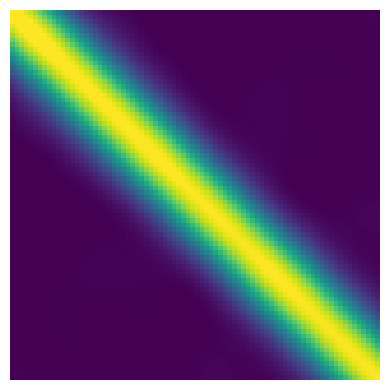

<Figure size 640x480 with 0 Axes>

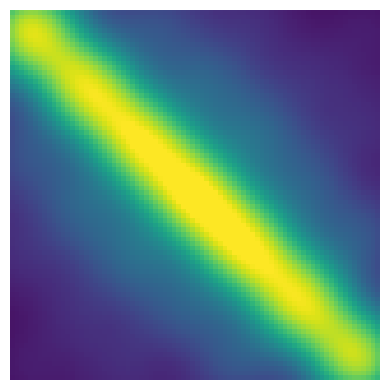

<Figure size 640x480 with 0 Axes>

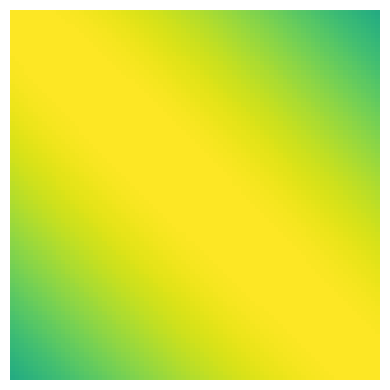

<Figure size 640x480 with 0 Axes>

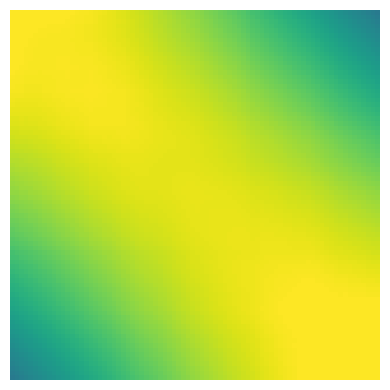

In [14]:
for ls, gp, cvae, vae in zip(plot_ls, gp_prior_paths, prior_cvae_paths, prior_vae_paths):
    gp_data = jnp.load(gp)
    cvae_data = jnp.load(cvae)
#     vae_data = jnp.load(vae)
    
    gp_samps = gp_data["samples"]
    cvae_samps = cvae_data["samples"]
#     vae_samps = vae_data["samples"]
    
    plt.clf()
    fig, axs = plt.subplots(1, 1, figsize=(4, 4))
    gp_cov = jnp.cov(gp_samps.T)
    plt.imshow(gp_cov, vmin=0, vmax=1)
    plt.axis("off")
    plt.tight_layout()
    fig.savefig(os.path.join(output_dir, kernel_plot, f"GP_cov_{str(ls).replace('.', '_')}.png"), 
                bbox_inches=0, transparent=True)
    plt.show()
    
    plt.clf()
    fig, axs = plt.subplots(1, 1, figsize=(4, 4))
    cvae_cov = jnp.cov(cvae_samps.T)
    plt.imshow(cvae_cov, vmin=0, vmax=1)
    plt.axis("off")
    plt.tight_layout()
    fig.savefig(os.path.join(output_dir, kernel_plot, f"PriorCVAE_cov_{str(ls).replace('.', '_')}.png"), 
                bbox_inches=0, transparent=True)
    plt.show()
    
#     plt.clf()
#     fig, axs = plt.subplots(1, 1, figsize=(4, 4))
#     vae_cov = jnp.cov(vae_samps.T)
#     plt.imshow(vae_cov, vmin=0, vmax=1)
#     plt.axis("off")
#     plt.tight_layout()
#     fig.savefig(os.path.join(output_dir, kernel_plot, f"PriorVAE_cov_{str(ls).replace('.', '_')}.png"),
#                bbox_inches=0, transparent=True)
#     plt.show()